In [1]:
import numpy as np # Advanced mathematical functions and linear algebra
import pandas as pd # Data processing ,Data analytics and easy CSV input / output
import seaborn as sns # make a niser plots-updates matplotlib plots
import matplotlib.pyplot as plt #Basic plotting functionality like in MATLAB 
#import missingno as msno # mising value visualizations
%matplotlib inline

In [14]:
#macro=pd.read_csv('../ADS-Final-Project-Sberbank/macro.csv/macro.csv')
train=pd.read_csv("../ADS-Final-Project-Sberbank/train.csv/train.csv")
#test=pd.read_csv("../ADS-Final-Project-Sberbank/test.csv/test.csv")


In [3]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [15]:
#clean data
bad_index = train[train.life_sq > train.full_sq].index
train.ix[bad_index, "life_sq"] = np.NaN

bad_index = train[train.life_sq<5].index
train.ix[bad_index, "life_sq"] = np.NaN

bad_index = train[train.full_sq<5].index
train.ix[bad_index, "full_sq"] = np.NaN

bad_index = train[train.kitch_sq<5].index
train.ix[bad_index, "kitch_sq"] = np.NaN

#
bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN

bad_index = train[train.build_year > 2018].index
train.ix[bad_index, "build_year"] = np.NaN

#
bad_index = train[train.state == 33].index
train.ix[bad_index, "state"] = 3

#
bad_index = train[train.num_room <= 0].index
train.ix[bad_index, "num_room"] = np.NaN

bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN
#
bad_index = train[train.floor > train.max_floor].index
train.ix[bad_index, "max_floor"] = np.NaN


In [16]:
use_index = train[train.product_type == "Investment"].index
train.ix[use_index , 'product_type'] = 0

use_index = train[train.product_type == "OwnerOccupier"].index
train.ix[use_index , 'product_type'] = 1

train['product_type'] = train['product_type'].astype(np.float32)

In [17]:
train['price_per_sq_k']=(train['price_doc']*0.001)/train["full_sq"]


In [18]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_per_sq_k
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4,0,13,22,1,0,52,4,5850000,136.046512
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,3,0,15,29,1,10,66,14,6000000,176.470588
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,27,0,4,67,10,5700000,132.558140
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,2,1,4,4,0,0,26,3,13100000,147.191011
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,108,17,135,236,2,91,195,14,16331452,212.096779


In [19]:

Y=train['price_doc']

X=train.drop(['id','price_doc', 'price_per_sq_k'],axis=1)




In [20]:

train2=train.dropna(subset=['price_per_sq_k'])
train2.reset_index()
Y2=train2['price_per_sq_k']
X2=train2.drop(['id','price_doc', 'full_sq','price_per_sq_k'],axis=1)


In [9]:


columnames=np.array(train.columns.values)
objfilter=np.array(list(train.dtypes==object),dtype=bool)
objnames=columnames[objfilter]
X = X.drop(list(objnames),axis=1)
X = X.astype(np.float32)

#




In [10]:
#first train
from sklearn.preprocessing import Imputer
# Creat out impute to replace missing values with the mean
imp=Imputer(missing_values='NaN', strategy='median', axis=0)
#imp=imp.fit(X)

# Impute our data
imp_X=pd.DataFrame(imp.fit_transform(X))
imp_X.columns=X.columns
imp_X.index=X.index

In [11]:
import random
# devide the data to train and test (only to train)
random.seed(a=11)
rows=random.sample(range(0,len(train)-1), int(len(train)*0.9))
xtrain=imp_X.ix[rows]
ytrain=Y.ix[rows]
xtest=imp_X.drop(rows)
ytest=Y.drop(rows)

In [12]:
# sort the data by the  house prices 


testdata=pd.concat([xtest,ytest],axis=1)
testdataSort=testdata.sort_values(['price_doc'])

In [13]:
ytest=testdataSort['price_doc']
xtest=testdataSort.drop(['price_doc'],axis=1)

MSE: 7210344434599.4004


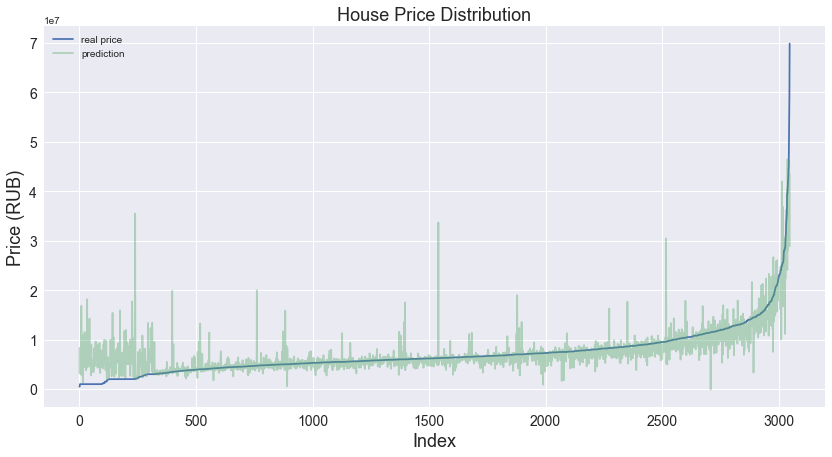

In [14]:
# Fit regression model-change some 
params = {'n_estimators': 500, 'max_depth': 8,
          'learning_rate': 0.1,'loss':'ls',
          'min_samples_split': 300, }
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, clf.predict(xtest))
print("MSE: %.4f" % mse)

#  plot the ress
plt.figure(figsize=(14,7))
plt.plot(range(xtest.shape[0]),ytest, label='real price')
plt.plot(range(xtest.shape[0]), clf.predict(xtest),label='prediction',alpha=0.4)
plt.legend()

plt.xlabel('Index', fontsize=18)
plt.ylabel('Price (RUB)',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('House Price Distribution',fontsize=18)
plt.show()

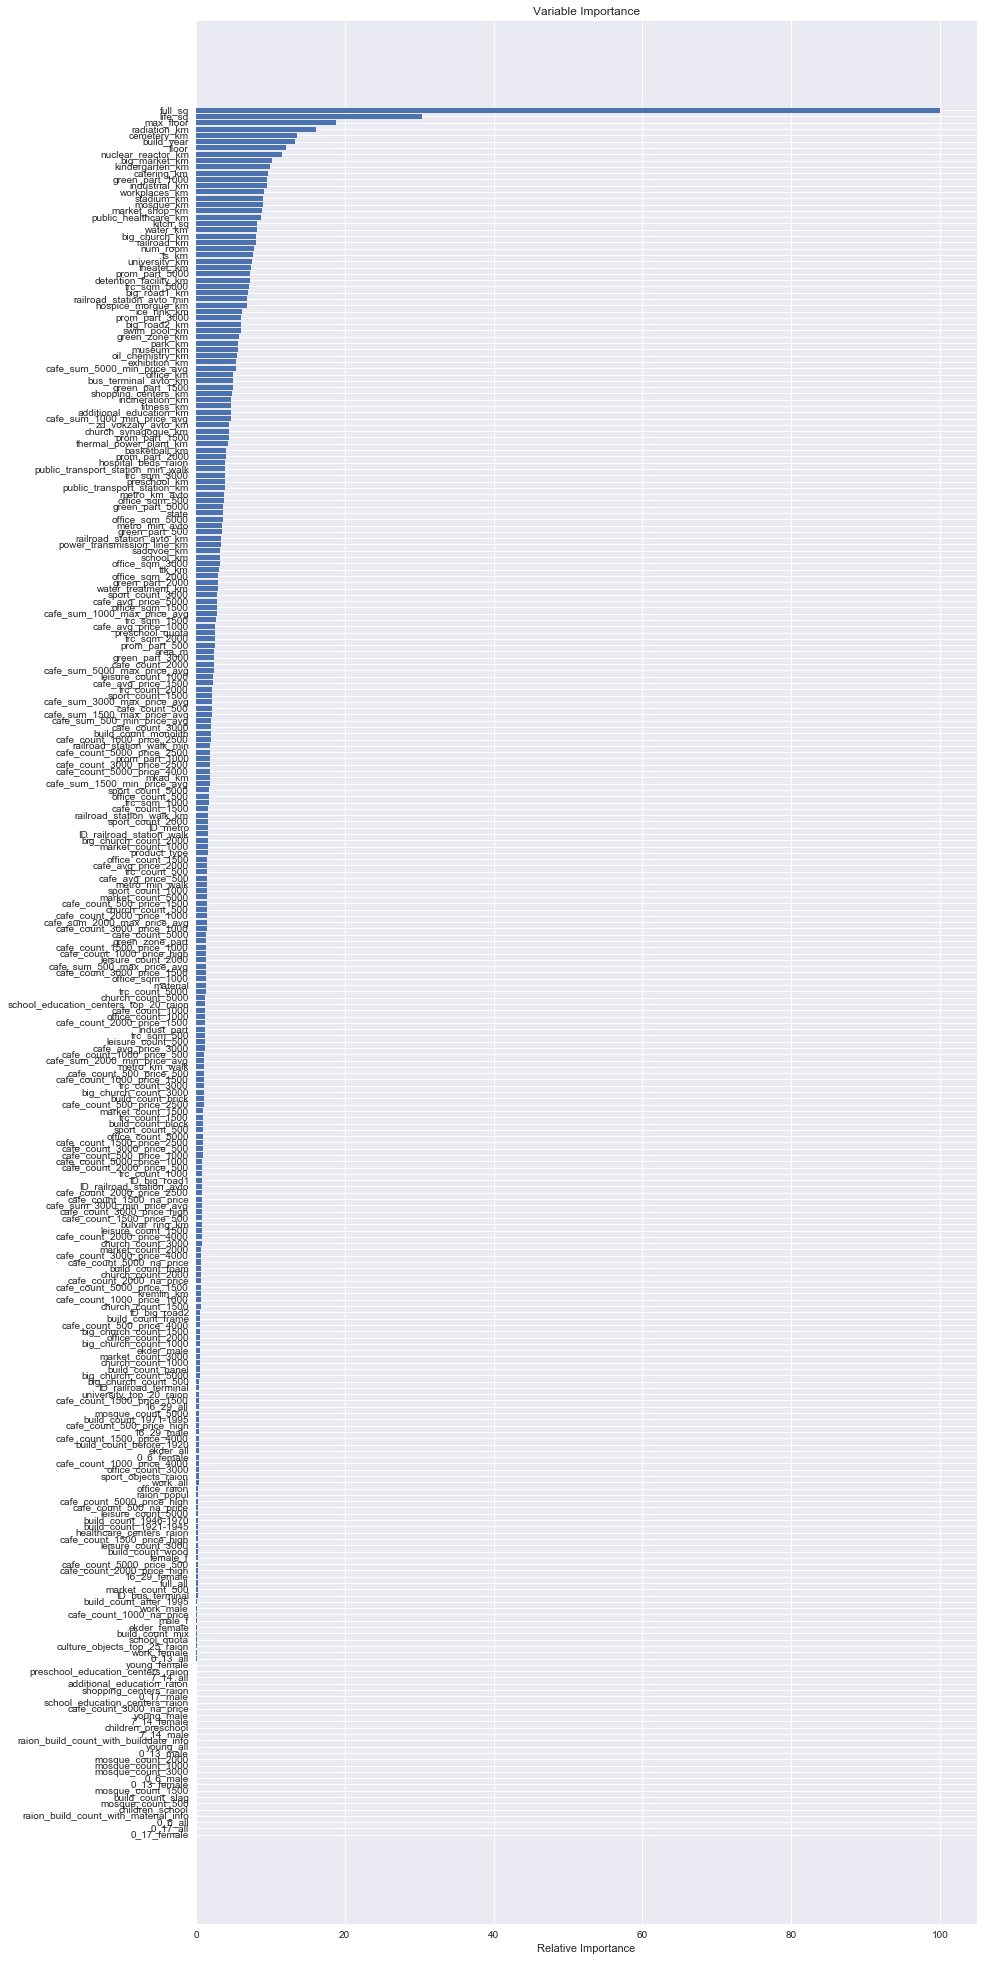

In [17]:

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
highfeatures=feature_importance[sorted_idx];
highnames=np.array(xtrain.columns.values)[sorted_idx];
plt.figure(figsize=(14,35))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(xtrain.columns.values)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [25]:
a=np.array(xtrain.columns.values)[sorted_idx]
np.where (a=="product_type")

(array([156], dtype=int64),)

In [21]:
columnames=np.array(train2.columns.values)
objfilter=np.array(list(train2.dtypes==object),dtype=bool)
objnames=columnames[objfilter]
X2 = X2.drop(list(objnames),axis=1)
X2 = X2.astype(np.float32)

In [22]:
#second train
from sklearn.preprocessing import Imputer
# Creat out impute to replace missing values with the mean
imp=Imputer(missing_values='NaN', strategy='median', axis=0)
#imp=imp.fit(X)

# Impute our data
imp_X=pd.DataFrame(imp.fit_transform(X2))
imp_X.columns=X2.columns
imp_X.index=X2.index

In [23]:
import random
# devide the data to train and test (only to train)
random.seed(a=11)

In [24]:

# devide the data to train and test (only to train)

rows=random.sample(range(0,len(train2)-1), int(len(train2)*0.9))
xtrain=imp_X.ix[rows]
ytrain=Y2.ix[rows]
xtest=imp_X.drop(rows)
ytest=Y2.drop(rows)

In [25]:
# sort the data by the  house prices 


testdata=pd.concat([xtest,ytest],axis=1)
testdataSort=testdata.sort_values(['price_per_sq_k'])
ytest=testdataSort['price_per_sq_k']
xtest=testdataSort.drop(['price_per_sq_k'],axis=1)

In [29]:
ytrain.sort_values()

3527     1.289677e+00
20244    1.388889e+00
1169     4.255319e+00
20388    4.788778e+00
634      4.857143e+00
1167     5.000000e+00
1960     5.256410e+00
1262     5.368015e+00
1596     5.738475e+00
854      5.903113e+00
216      6.000000e+00
1488     6.024096e+00
1579     6.039416e+00
2999     6.186933e+00
11923    6.329114e+00
9221     6.500000e+00
5459     6.896875e+00
858      7.080923e+00
4530     8.088235e+00
801      8.389831e+00
2097     8.780488e+00
2677     8.958486e+00
498      9.000000e+00
1622     9.090909e+00
364      9.210526e+00
29061    9.433962e+00
16178    9.611650e+00
5848     9.615385e+00
3258     9.677419e+00
18341    9.800000e+00
             ...     
11085    5.393939e+02
16099    5.416667e+02
1188     7.000000e+02
6112     8.628400e+02
2009     1.154000e+03
2118     2.020202e+03
26925    3.793778e+03
16289    4.457400e+03
22871    4.740000e+03
22722    4.740000e+03
23726    4.819000e+03
25569    4.838066e+03
24627    5.000550e+03
26386    5.510645e+03
26264    5

In [28]:
# Fit regression model-change some 
params = {'n_estimators': 500, 'max_depth': 8,
          'learning_rate': 0.1,'loss':'ls',
          'min_samples_split': 300, }
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, clf.predict(xtest))
print("MSE: %.4f" % mse)

#  plot the ress
plt.figure(figsize=(14,7))
plt.plot(range(xtest.shape[0]),ytest, label='real price')
plt.plot(range(xtest.shape[0]), clf.predict(xtest),label='prediction',alpha=0.4)
plt.legend()

plt.xlabel('Index', fontsize=18)
plt.ylabel('Price (RUB)',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('House Price Distribution',fontsize=18)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').